# The Sparks Foundation - #GRIPAPRIL21

# Name : Tanvi Sanjay Gharte¶

# Task 2: Prediction using Unsupervised ML

# Predict the optimum number of clusters and represent it visually from the given iris data

# ---------------------------------------------------------------------------------------------------------------

# Importing the required libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
%matplotlib inline

# Importing and understanding dataset

In [8]:
df=pd.read_csv('Iris.csv')

In [9]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# observation: dataset has 150 rows and 5 columns with 0 null values

In [14]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# 1.Dropping unnecessary columns

In [17]:
iris=df.drop(['Id','Species'],axis=1)
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# 2. Checking for outliers 

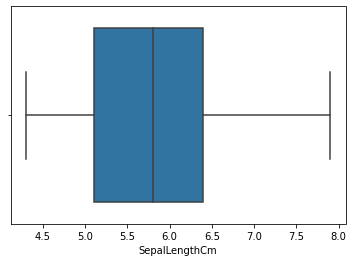

In [20]:
sns.boxplot(x=iris['SepalLengthCm'])

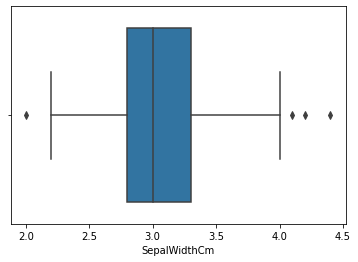

In [21]:
sns.boxplot(x=iris['SepalWidthCm'])

# Treatment of Outliers

In [22]:
for i in ['SepalWidthCm']:
    q3,q1 = np.percentile(iris.loc[ : , i],[75,25])
    iqr = q3-q1
 
    max = q3+(1.5*iqr)
    min = q1-(1.5*iqr)
#replacing the outlier values with NaN
    iris.loc[iris[i] < min, i] = np.nan
    iris.loc[iris[i] > max, i] = np.nan

In [23]:
#replacing the NaN values with the mean/average values in the column
iris['SepalWidthCm'].fillna(iris['SepalWidthCm'].mean(), inplace=True)

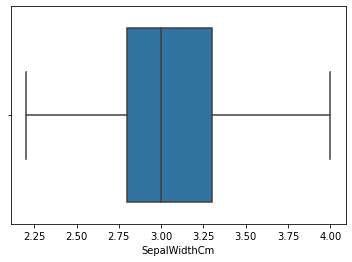

In [24]:
sns.boxplot(x = iris['SepalWidthCm'])

# Observation - The outliers have been successfully removed

# 4. Finding the correlation between attributes 

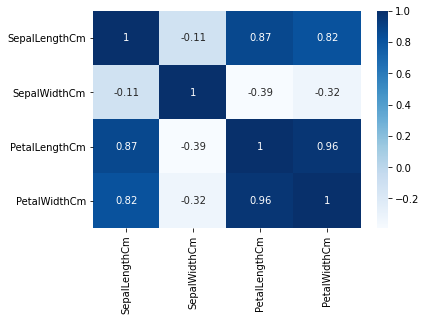

In [25]:
corr = iris.corr()
sns.heatmap(corr, cmap = "Blues", vmax = 1, annot_kws = {'size':10}, annot = True)
#vmax: value to anchor the colourmap
#annot_kws: specifies the size of values displayed in each cell
#annot = True: write the data value in each cell
plt.show()

#darker the colour, stronger the correlation.
#stronger the correlation, more useful the attributes are

# creating the k-means model 

In [26]:
x = iris.iloc[ : , -2: ].values #allocating the last 2 columns of 'iris' to 'x' as they're strongly correlated

In [27]:
from sklearn.cluster import KMeans

#to figure out the right number of clusters we use the Within-Cluster-Sum-of-Squares (WCSS) method
#WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids
wcss = [] #this list will collect different wcss values for the clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# creating the 'Elbow Graph' to find the value of k

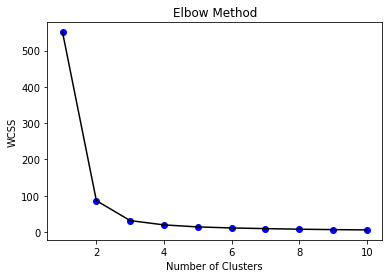

In [28]:
k = range(1, 11)
plt.scatter(k, wcss, c = 'blue')
plt.plot(k, wcss, c = 'black')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
#set the value of number of clusters to 3 and make predictions
kmeanc = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred = kmeanc.fit_predict(x)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


# Visualization of Clusters¶

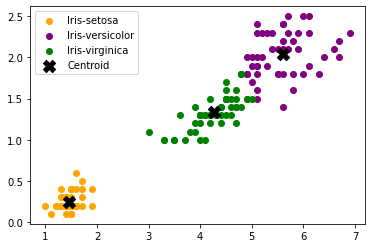

In [30]:
#we use y_pred values' row index as a reference to extract the corresponding rows from x

plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], c = 'orange', label = 'Iris-setosa') #for cluster 0
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], c = 'purple', label = 'Iris-versicolor') #for cluster 1
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], c = 'green', label = 'Iris-virginica') #for cluster 2

#to get centroid we use inbuilt clusters_centers_ function
plt.scatter(kmeanc.cluster_centers_[ : , 0], kmeanc.cluster_centers_[ : , 1], s = 150, c = 'black', label = 'Centroid', marker = 'X')

plt.legend()

# Conclusion: I have found that the optimal number of clusters for the given dataset is 3 and also visualized the same. 